<a href="https://colab.research.google.com/github/Faysoula/AI-Class-Projects/blob/main/Faysal%26Maya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

***Data Preperation yay***

In [3]:
#Loading the dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()
X, y = mnist["data"], mnist["target"]#x contains values, y contains labels

#Splitting the dataset into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7.0)

print(X_train.shape, X_test.shape, sep = "\t")
print(y_train.shape, y_test.shape, sep = "\t")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(60000, 784)	(10000, 784)
(60000,)	(10000,)


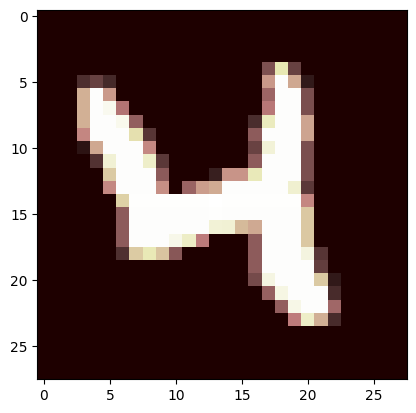

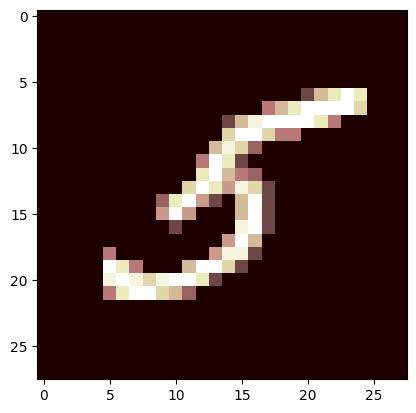

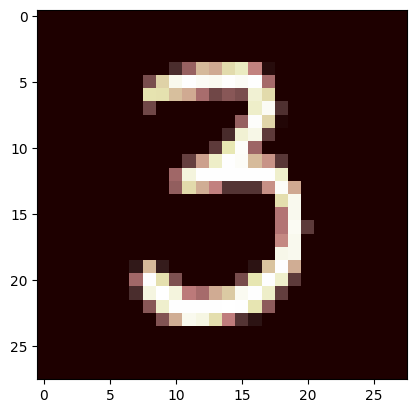

In [4]:
#Visualising a few samples
def visualise(index):
  pixels = pd.DataFrame(mnist.data)
  labels = pd.DataFrame(mnist.target)
  label = labels.loc[index]
  pixel = pixels.loc[index]
  pixel = np.array(pixel, dtype='uint8')
  pixel = pixel.reshape((28,28))#each image in MNIST is 28x28
  plt.imshow(pixel, cmap='pink')
  plt.show()

visualise(20)
visualise(35)
visualise(50)

**Data** **Preprocessing** LETS GO STEP 2!!

In [5]:
#Ensuring all samples are scaled to the same range
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**next!! THE CLASSIFICATION MODEL :O**

In [6]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

Now lets make a prediction and test our model

In [7]:
#Making a prediction and testing the accuracy using different methods
y_pred = model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("Accuracy: ",accuracy_score(y_pred, y_test))

Accuracy:  0.9672
Accuracy:  0.9672


***Confusion matrix :*** 😶‍🌫️😕😵


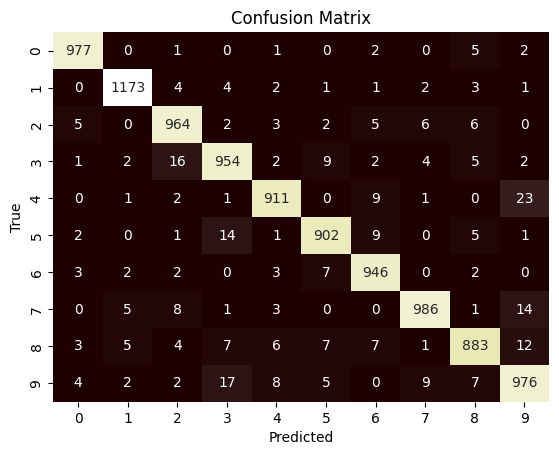

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="pink", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

HyperParameter Tunning (👉ﾟヮﾟ)👉

In [9]:
rf_clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3],
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy}")

Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  12.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  13.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  25.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  24.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=  12.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=  12.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=  24.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=  24.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  12.6s
[CV] END max_dep

**Confusion matrix 2, YES 2 WHAT A PLOT TWIST** 🤯

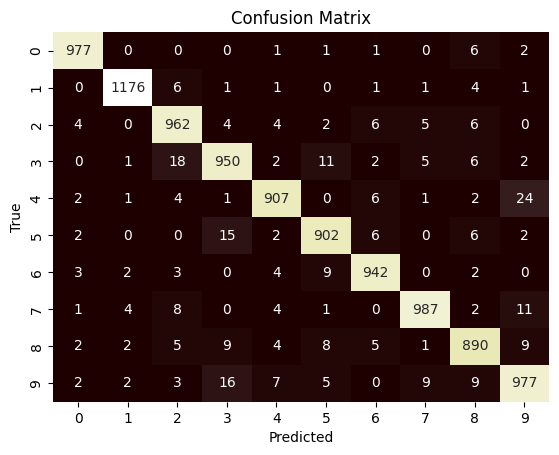

In [11]:
#Creating a new confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt="d", cmap="pink", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Lets Visualize some this models predicted samples:**

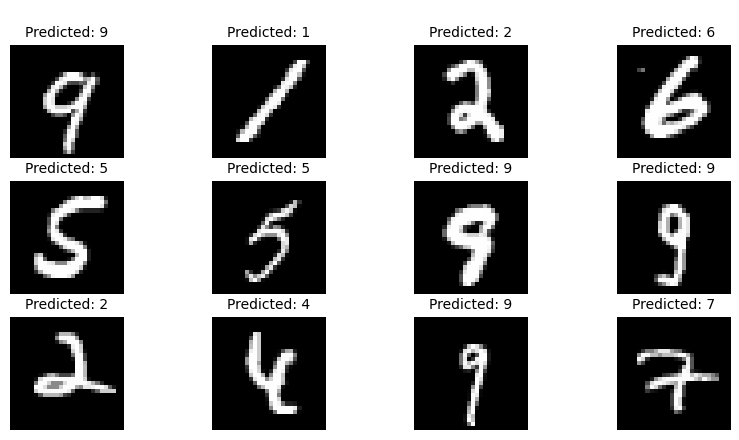

In [14]:
import random
random_indices = random.sample(range(len(X_test)), 12)
sample_images=X_test[random_indices]
sample_labels = y_pred[random_indices]

sample_predictions = model.predict(sample_images)

plt.figure(figsize=(10,5))

for i in range (len(sample_images)):
  plt.subplot(3, 4, i + 1)
  plt.imshow(sample_images[i].reshape(28,28), cmap = 'gray')
  plt.title(f"\nPredicted: {sample_predictions[i]}", fontsize = 10)
  plt.axis('off')

plt.show()

**Model Challenges(its trying its best)**😓

The model achieves high accuracy, yet the hyperparameter tuning process, particularly the grid search with cross-validation, is notably time-intensive and places substantial computational demands on the GPU.

**Conclusion an Effectiveness**

The current machine learning model demonstrates high efficacy in digit classification, achieving an accuracy of approximately 97%. This robust performance is further evidenced by the substantial number of true positives indicated in the confusion matrix, underscoring the model's precision in correctly identifying digits.